In [1]:

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

# Carregar o dataset
file_path = 'ev_charging_patterns.csv'  # Substituir pelo caminho correto
data = pd.read_csv(file_path)


In [2]:

# Limpeza de dados e pré-processamento
# Preenchendo valores ausentes em colunas numéricas com a média
data['Energy Consumed (kWh)'].fillna(data['Energy Consumed (kWh)'].mean(), inplace=True)
data['Charging Rate (kW)'].fillna(data['Charging Rate (kW)'].mean(), inplace=True)
data['Distance Driven (since last charge) (km)'].fillna(data['Distance Driven (since last charge) (km)'].mean(), inplace=True)

# Convertendo horários para datetime
data['Charging Start Time'] = pd.to_datetime(data['Charging Start Time'])
data['Charging End Time'] = pd.to_datetime(data['Charging End Time'])

# Criando uma nova coluna para tempo de carregamento real
data['Actual Charging Time (hours)'] = (data['Charging End Time'] - data['Charging Start Time']).dt.total_seconds() / 3600

# Transformando variáveis categóricas em numéricas (dummies)
categorical_columns = ['Vehicle Model', 'Charging Station Location', 'Time of Day',
                       'Day of Week', 'User Type', 'Charger Type']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Garantindo que não haja valores ausentes no dataset após transformações
data.fillna(data.select_dtypes(include=['float64', 'int64']).mean(), inplace=True)

# Exibindo dados após a limpeza
print("Dados processados:")
print(data.head())


Dados processados:
  User ID  Battery Capacity (kWh) Charging Station ID Charging Start Time  \
0  User_1              108.463007         Station_391 2024-01-01 00:00:00   
1  User_2              100.000000         Station_428 2024-01-01 01:00:00   
2  User_3               75.000000         Station_181 2024-01-01 02:00:00   
3  User_4               50.000000         Station_327 2024-01-01 03:00:00   
4  User_5               50.000000         Station_108 2024-01-01 04:00:00   

    Charging End Time  Energy Consumed (kWh)  Charging Duration (hours)  \
0 2024-01-01 00:39:00              60.712346                   0.591363   
1 2024-01-01 03:01:00              12.339275                   3.133652   
2 2024-01-01 04:48:00              19.128876                   2.452653   
3 2024-01-01 06:42:00              79.457824                   1.266431   
4 2024-01-01 05:46:00              19.629104                   2.019765   

   Charging Rate (kW)  Charging Cost (USD)  State of Charge (Start 

<ipython-input-2-656343e192c8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Energy Consumed (kWh)'].fillna(data['Energy Consumed (kWh)'].mean(), inplace=True)
<ipython-input-2-656343e192c8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

In [3]:

# Modelo 1: Regressão - Predizer tempo de carregamento
X_reg = data.drop(['Actual Charging Time (hours)', 'User ID', 'Charging Start Time',
                   'Charging End Time', 'Charging Station ID'], axis=1)
y_reg = data['Actual Charging Time (hours)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

y_pred_reg = regressor.predict(X_test_reg)
print("Erro Médio Absoluto (Regressão):", mean_absolute_error(y_test_reg, y_pred_reg))


Erro Médio Absoluto (Regressão): 0.7996647727272727


In [4]:

# Modelo de Classificação - Tipo de carregador mais adequado
X_clf = data.drop(['User ID', 'Charging Start Time', 'Charging End Time',
                   'Charging Station ID', 'Charger Type_Level 1'], axis=1)
y_clf = data['Charger Type_Level 1']

# Dividindo os dados em treino e teste
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Treinando o modelo de classificação
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_clf, y_train_clf)

# Fazendo predições e avaliando o modelo
y_pred_clf = classifier.predict(X_test_clf)
print("Acurácia (Classificação):", accuracy_score(y_test_clf, y_pred_clf))
print("Matriz de Confusão:")
print(confusion_matrix(y_test_clf, y_pred_clf))


Acurácia (Classificação): 0.6515151515151515
Matriz de Confusão:
[[132  35]
 [ 57  40]]


In [5]:

# Modelo 3: Regressão - Predizer autonomia restante
X_auto = data.drop(['Distance Driven (since last charge) (km)', 'User ID', 'Charging Start Time',
                    'Charging End Time', 'Charging Station ID'], axis=1)
y_auto = data['Distance Driven (since last charge) (km)']

X_train_auto, X_test_auto, y_train_auto, y_test_auto = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

regressor_auto = RandomForestRegressor(random_state=42)
regressor_auto.fit(X_train_auto, y_train_auto)

y_pred_auto = regressor_auto.predict(X_test_auto)
print("Erro Médio Absoluto (Regressão - Autonomia):", mean_absolute_error(y_test_auto, y_pred_auto))


Erro Médio Absoluto (Regressão - Autonomia): 70.5658941995389


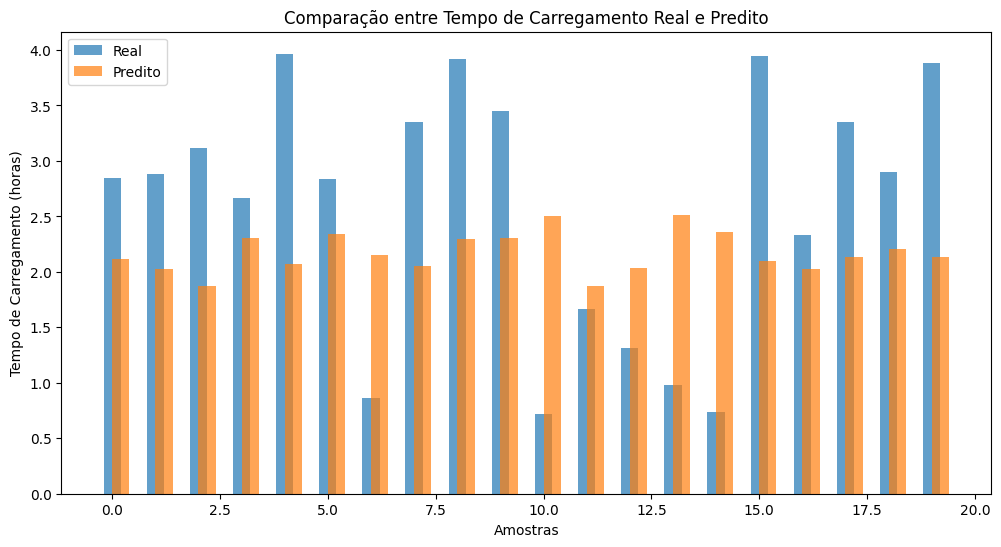

In [6]:
import matplotlib.pyplot as plt

# Predições do modelo de tempo de carregamento
sample_input = X_test_reg.iloc[:20]
sample_predictions = regressor.predict(sample_input)
real_values = y_test_reg.iloc[:20]

# Gráfico de barras para comparar valores reais e preditos
plt.figure(figsize=(12, 6))
x = range(len(sample_predictions))
plt.bar(x, real_values, width=0.4, label='Real', alpha=0.7, align='center')
plt.bar(x, sample_predictions, width=0.4, label='Predito', alpha=0.7, align='edge')
plt.title("Comparação entre Tempo de Carregamento Real e Predito")
plt.xlabel("Amostras")
plt.ylabel("Tempo de Carregamento (horas)")
plt.legend()
plt.show()


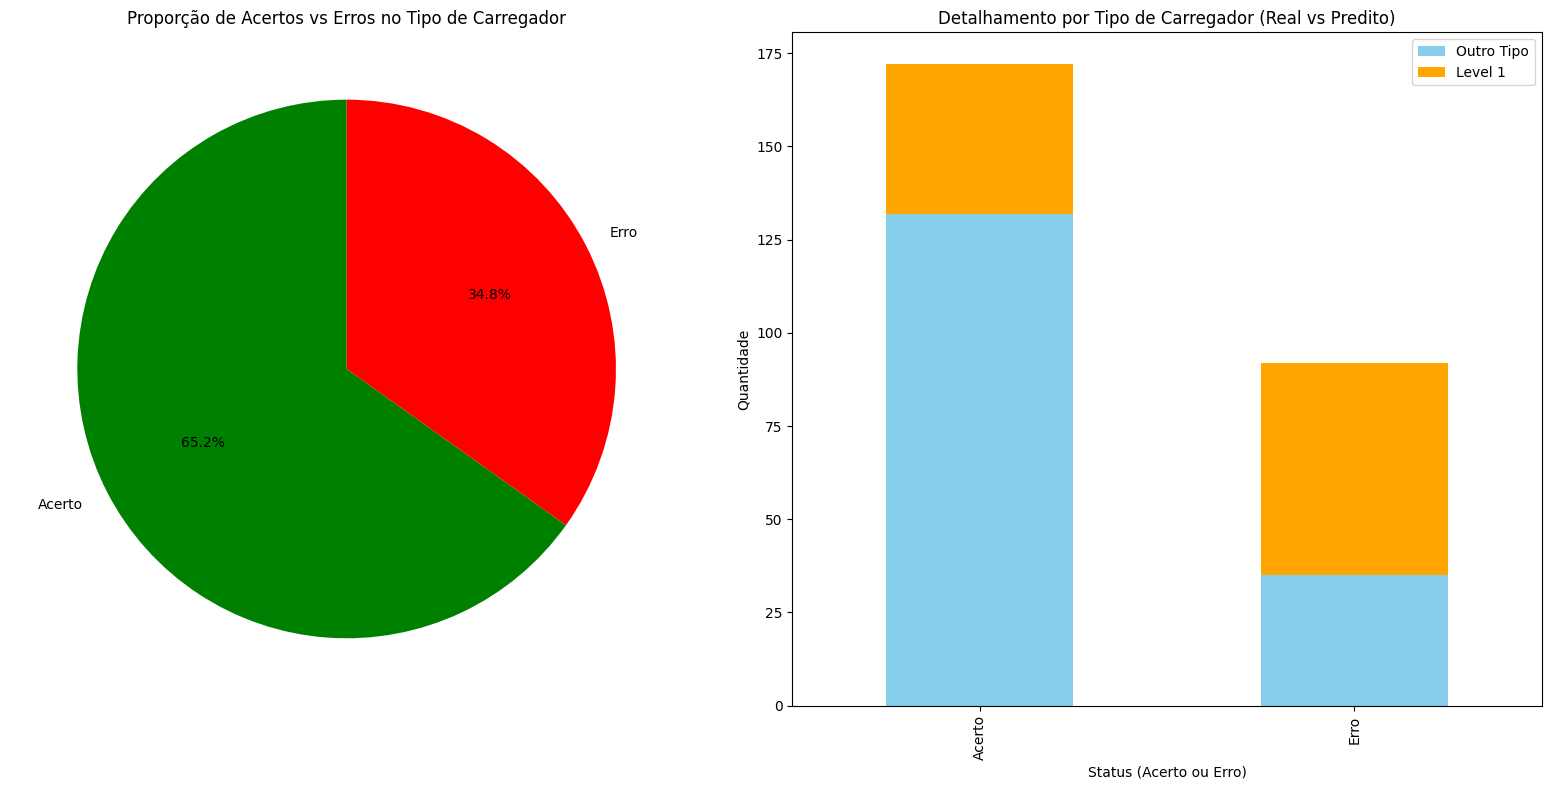

In [9]:
import seaborn as sns

# Predições do modelo de classificação
sample_input_clf = X_test_clf
sample_predictions_clf = classifier.predict(sample_input_clf)

# Comparando predições com os valores reais
real_values_clf = y_test_clf

# Criando um DataFrame para análise
clf_results = pd.DataFrame({
    'Real': real_values_clf,
    'Predito': sample_predictions_clf
})

# Contando combinações (acertos e erros)
clf_results['Status'] = clf_results.apply(lambda row: 'Acerto' if row['Real'] == row['Predito'] else 'Erro', axis=1)

# Contagem geral
status_counts = clf_results['Status'].value_counts()
type_counts = clf_results.groupby(['Status', 'Real']).size().unstack(fill_value=0)

# Gráficos
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de pizza mostrando a proporção de acertos e erros
ax[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
ax[0].set_title("Proporção de Acertos vs Erros no Tipo de Carregador")

# Gráfico de barras mostrando os tipos de carregadores preditos corretamente e incorretamente
type_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax[1])
ax[1].set_title("Detalhamento por Tipo de Carregador (Real vs Predito)")
ax[1].set_xlabel("Status (Acerto ou Erro)")
ax[1].set_ylabel("Quantidade")
ax[1].legend(["Outro Tipo", "Level 1"])

plt.tight_layout()
plt.show()


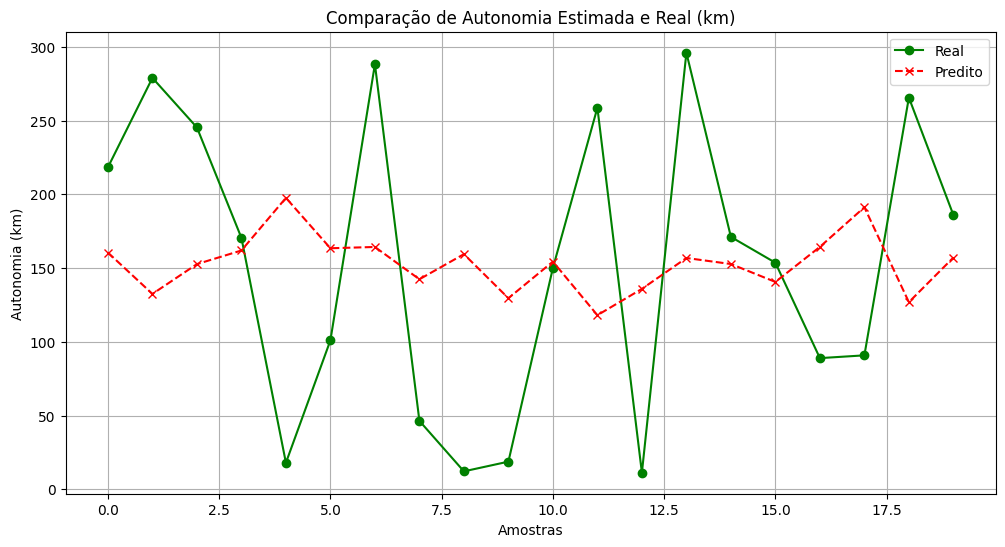

In [8]:
# Predições do modelo de autonomia
sample_input_auto = X_test_auto.iloc[:20]
sample_predictions_auto = regressor_auto.predict(sample_input_auto)
real_values_auto = y_test_auto.iloc[:20]

# Gráfico para comparar autonomia predita e real
plt.figure(figsize=(12, 6))
x = range(len(sample_predictions_auto))
plt.plot(x, real_values_auto, marker='o', label='Real', linestyle='-', color='green')
plt.plot(x, sample_predictions_auto, marker='x', label='Predito', linestyle='--', color='red')
plt.title("Comparação de Autonomia Estimada e Real (km)")
plt.xlabel("Amostras")
plt.ylabel("Autonomia (km)")
plt.legend()
plt.grid(True)
plt.show()
